# Objective

Wziac 2 zdjecia i porownac je przy uzyciu:

* Pixel Wise MSE Loss -- ??

* Perceptrual Loss using VGG16 or others CNN



In [ ]:
# PPL USING VGG16
import tensorflow as tf
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape=(224, 224, 3))

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
selectedLayers = [1,2,8,12]

In [ ]:
selectedLayers = ['block1_conv1', 'block1_conv2', 'block3_conv2', 'block4_conv2']

In [ ]:
import keras

#a list with the output tensors for each selected layer:
selectedOutputs = [conv_base.layers[i].output for i in selectedLayers]
#selectedOutputs =  [lossModel.get_layer(name).output for name in selectedLayers]

#a new model that has multiple outputs:
lossModel = keras.Model(conv_base.inputs,selectedOutputs)


**Kurwa zostaje cala siec w smmary bo przeciez sie musi przetworezyc zeby dostac jakis output**

In [ ]:
lossModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_keras_image(img_path):
  img = image.load_img(img_path, target_size=(256,256))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  print(img_tensor.shape)
  return img_tensor

In [ ]:
from tensorflow.keras import models

In [ ]:
tensor = preprocess_keras_image("/content/Sad.jpg")
activations = lossModel.predict(tensor)

(1, 256, 256, 3)


In [ ]:
tensor2 = preprocess_keras_image("/content/Suprise.jpg")
activations2 = lossModel.predict(tensor2)

(1, 256, 256, 3)


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 256, 256, 64)


In [ ]:
activations

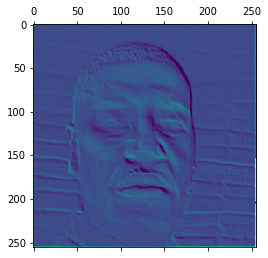

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')

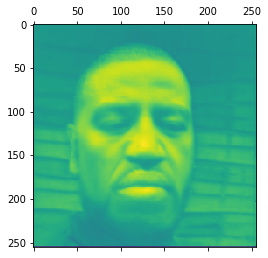

In [ ]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0,:,:,4],cmap='viridis')

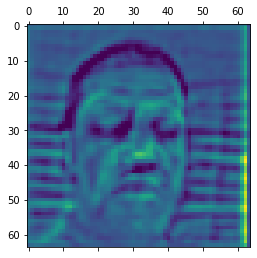

In [ ]:
third_layer_activation = activations[2]
plt.matshow(third_layer_activation[0,:,:,4],cmap='viridis')

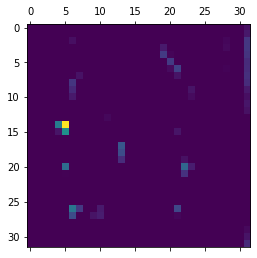

In [ ]:
fourth_layer_activation = activations[3]
plt.matshow(fourth_layer_activation[0,:,:,4],cmap='viridis')

In [ ]:
# na aktywacjach przeprowadzic l2 loss

# WZIETE Z IMAGE2STYLEGAN

# Loss function to calculate MSE and Perceptual losses

In [ ]:
def loss_function(syn_img, img, img_p, MSE_loss, upsample, perceptual):

  #UpSample synthesized image to match the input size of VGG-16 input. 
  #Extract mid level features for real and synthesized image and find the MSE loss between them for perceptual loss. 
  #Find MSE loss between the real and synthesized images of actual size
  syn_img_p = upsample(syn_img)
  syn0, syn1, syn2, syn3 = perceptual(syn_img_p)
  r0, r1, r2, r3 = perceptual(img_p)
  mse = MSE_loss(syn_img,img)

  per_loss = 0
  per_loss += MSE_loss(syn0,r0)
  per_loss += MSE_loss(syn1,r1)
  per_loss += MSE_loss(syn2,r2)
  per_loss += MSE_loss(syn3,r3)

  return mse, per_loss

In [ ]:
len(activations)

4

In [ ]:
# TO MOZNA CZYTELNIEJ NAPISAC BTW Xd

import tensorflow.keras.losses

mse = tensorflow.keras.losses.MeanSquaredError() # AUTO reduction type

def percept_loss(activations1, activations2, mse):
  assert len(activations1) == len(activations2)
  per_loss = 0
  for n in range(4):
    # print(per_loss)
    conv = activations1[n]
    conv2 = activations2[n]
    per_loss += mse(conv, conv2).numpy()
  return per_loss


def loss_function(my_img, average_image, mse, activations1, activations2):
  mse_loss = mse(my_img, average_image).numpy() # Kolejnosc czy wazna jest
  ppl_loss = percept_loss(activations1, activations2, mse)
  return mse_loss, ppl_loss

mse_loss, ppl_loss = loss_function(tensor, tensor2, mse, activations, activations2)
print(mse_loss)
print(ppl_loss)

0.0083560655
10.869971706997603


In [ ]:
# Zrobic to na poziomie modelu tez sie da
# https://stackoverflow.com/questions/47675094/implement-perceptual-loss-with-pretrained-vgg-using-keras

# vgg16 implementation from scratch

** BADANIE **

sect.2 convNet configurations

sect.3 Details image class.. training and evaluation



# 2.1 Architecture

* input is 224 x 224 RGB image
* preprocessing: subtracting the mean RGB value, computed on training set from each pixel
* filters 3x3
* conv stride is 1 pixel
* Max pooling 2x2 pixel window with stride 2
* then FC layers (same in all networks)
* Final layer us soft-max layer
* Hidden layers equiped with Relu

# 2.2 Configuration

Look at table paper


```
!!! THAT MEAN PADDING IS SET TO 'same' in tensorflow !!!

The convolution stride is
fixed to 1 pixel; the spatial padding of conv. layer input is such that the spatial resolution is preserved
after convolution, i.e. the padding is 1 pixel for 3 × 3 conv. layers
```


# 3.1 Training


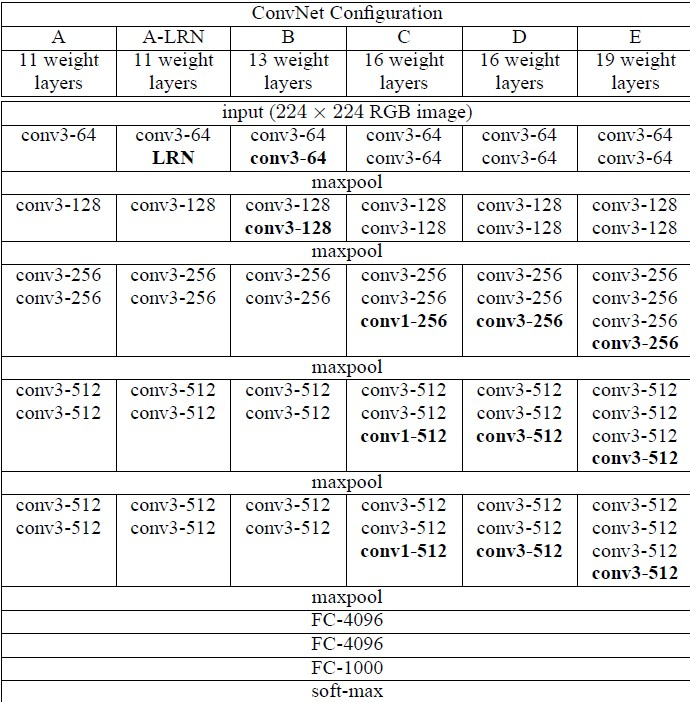

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation='relu',
                        input_shape=(224,224,3)))
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides=2))
model.add(layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides=2))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides=2))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides=2))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides=2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1000, activation='softmax')) # Bo ImageNet teoretycznie

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
# Training
batch_size = 256
momentum = 0.9 # jakis hyperparam
l2 = 5*(10^-4)
lrate = 10^-3

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lrate)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))


'''
File structure to ImageDataGenerator

data/

cat
dog/

1.jpg
.
.
n.jpg

test

cat
dog/

1.jpg
.
.
n.jpg
'''

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])